In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter
#

# 1. 导入必要的库

In [2]:
# 2. 定义数据加载器
batch_size = 64

# Normalize 归一化处理，0.1307 数据集的全局平均像素值，0.3081 是 MNIST 数据集的全局像素值标准差;这个参数 也可以不用
#不用归一化参数 (training time:37s, Accuracy: 97.8%)，使用归一化参数 （training time:60s, Accuracy: 97.68％）
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)) 
])

train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



In [3]:
# 3. 定义模型
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)  #图片size is 28*28
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)  # 图片有10个分类

    def forward(self, x):
        x = x.view(-1, 28*28)  # 将输入平铺成一维
        x = torch.relu(self.fc1(x))  #使用relu 激活函数
        x = torch.relu(self.fc2(x))  #使用relu 激活函数
        x = self.fc3(x)
        return x

model = SimpleNN()

# 4. 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# 5. 训练模型
num_epochs = 10
writer = SummaryWriter()  # 创建一个 SummaryWriter 来写 TensorBoard 日志

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        
        # print("debug...")
        # print(outputs,type(outputs))

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    # print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')
    average_loss = running_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {average_loss:.4f}')
    
    #remove comment if you want to show chart in tensorboard
    # writer.add_scalar('training_loss', average_loss, epoch)  # 记录 loss

print('Finished Training')
# writer.close()

Epoch [1/10], Loss: 0.3254
Epoch [2/10], Loss: 0.1133
Epoch [3/10], Loss: 0.0773
Epoch [4/10], Loss: 0.0563
Epoch [5/10], Loss: 0.0460
Epoch [6/10], Loss: 0.0354
Epoch [7/10], Loss: 0.0281
Epoch [8/10], Loss: 0.0221
Epoch [9/10], Loss: 0.0176
Epoch [10/10], Loss: 0.0126
Finished Training


Accuracy of the model on the test images: 97.99%
True label: 1, Predicted: 9


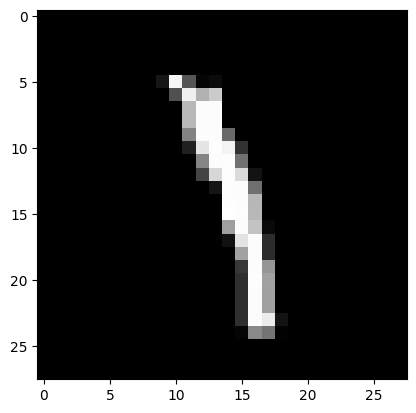

True label: 4, Predicted: 9


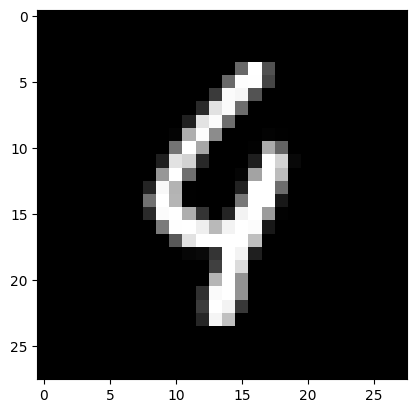

True label: 4, Predicted: 2


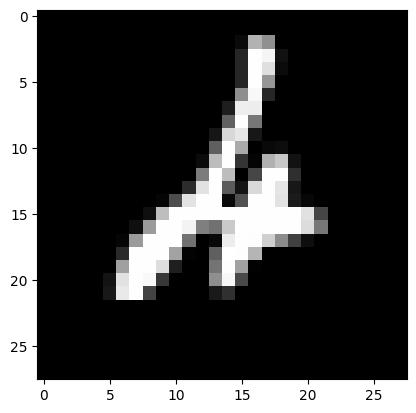

True label: 6, Predicted: 0


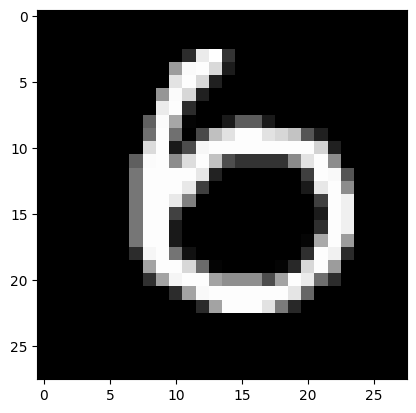

True label: 9, Predicted: 3


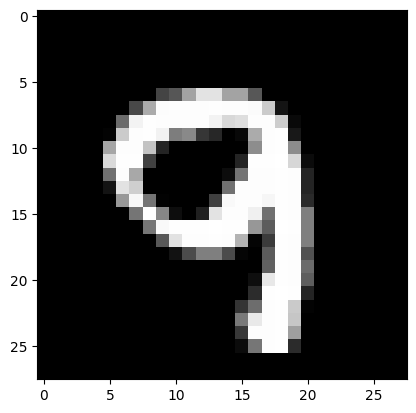

True label: 2, Predicted: 7


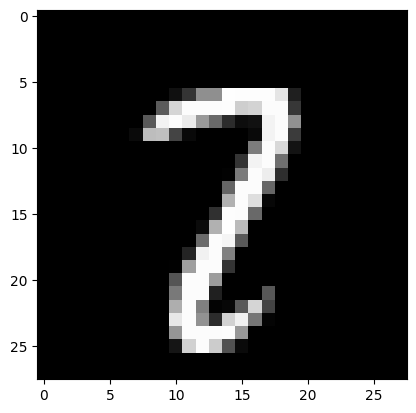

True label: 5, Predicted: 3


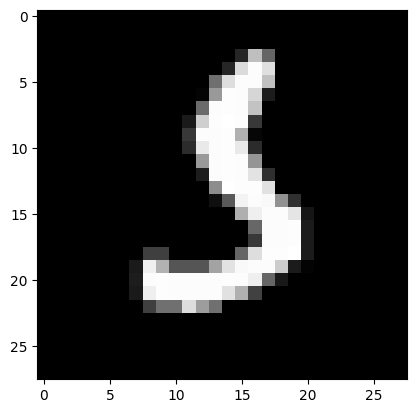

True label: 3, Predicted: 7


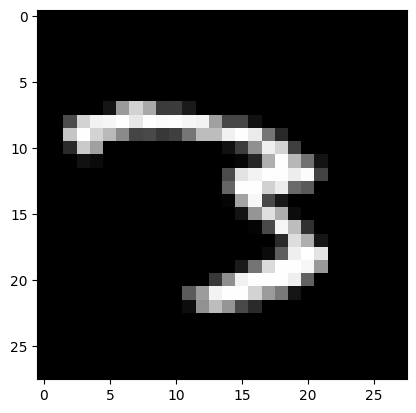

True label: 4, Predicted: 2


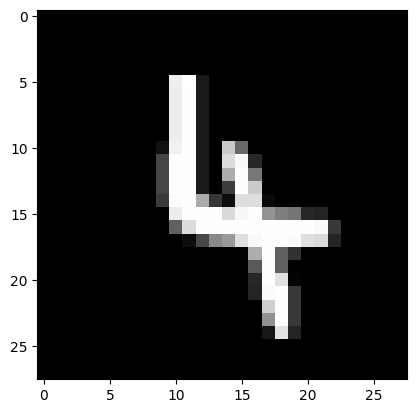

True label: 6, Predicted: 0


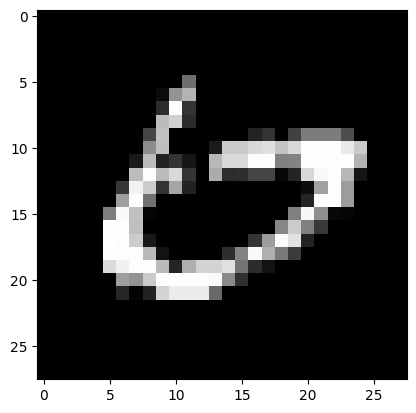

In [5]:
# 6. 评估模型
model.eval()
correct = 0
total = 0

incorrect_images = []
incorrect_labels = []
incorrect_preds = []


with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # 记录预测错误的数据
        incorrect_mask = (predicted != labels)
        incorrect_images.extend(images[incorrect_mask])
        incorrect_labels.extend(labels[incorrect_mask])
        incorrect_preds.extend(predicted[incorrect_mask])


print(f'Accuracy of the model on the test images: {100 * correct / total:.2f}%')


# 显示预测错误的图片和对应的标签
def imshow(img):
    img = img * 0.3081 + 0.1307  # 反标准化
    npimg = img.numpy()
    plt.imshow(npimg, cmap='gray')
    plt.show()

# 显示前10张预测错误的图片
# num_images_to_show = 10
# for i in range(min(num_images_to_show, len(incorrect_images))):
#     print(f'True label: {incorrect_labels[i]}, Predicted: {incorrect_preds[i]}')
#     imshow(incorrect_images[i][0])



In [6]:
%load_ext tensorboard
%tensorboard --logdir ./runs

#如果tensorboard没有本次的数据，请检查上在的代码中的SummaryWriter的写入代码是否被注释了。

Reusing TensorBoard on port 6006 (pid 100338), started 1:23:12 ago. (Use '!kill 100338' to kill it.)